In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from bilinear_model import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
mean_df = pd.read_csv("connection_matrix_mean.csv", index_col = 0)
var_df = pd.read_csv("connection_matrix_var.csv", index_col = 0)

In [3]:
mean_df = mean_df.rename(index={'xbc': 'bc5xbc'})
mean_df = mean_df.sort_index().sort_index(axis=1)
var_df = var_df.rename(index={'xbc': 'bc5xbc'})
var_df = var_df.sort_index().sort_index(axis=1)

<AxesSubplot:>

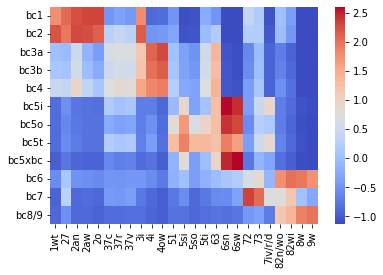

In [4]:
sns.heatmap(mean_df, cmap='coolwarm')

<AxesSubplot:>

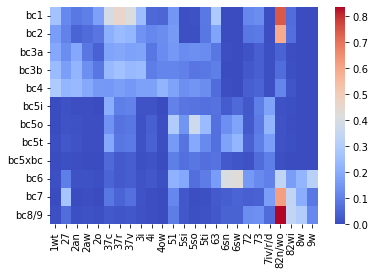

In [5]:
sns.heatmap(var_df, cmap='coolwarm')

In [6]:
with open('rgc_df_gene_selected.pkl', 'rb') as f:
    rgc_df = pickle.load(f)
rgc_df_all = rgc_df.copy()
rgc_df_all

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
25,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
3,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.571013,0.571013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589141,0.957386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,0.333000,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [7]:
df = pd.read_csv("RGC_type_correspondence_combined.csv")
df

,Goetz et al. (2022) Type,Bae et al. (2018) Eyewire type,Tran et al. (2019) Cluster
0,ON sus alpha,8w,C43
1,OFFhOS,2aw,C9
2,OFFvOS,2aw,C5
3,ON tr SmRF,6sn,C30
4,OFF tr alpha,4ow,C45
5,OFF tr SmRF,4i,C21
6,ONhOS SmRF,82wi,C27
7,ONhOS LgRF,82n/wo,C36
8,ONvOS SmRF,72,C38
9,"ON DS sus DN, T, V",7iv/r/d,C10


In [8]:
# Initialize an empty dictionary
rgc_map = {}

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract the value and key from the row
    value = row['Bae et al. (2018) Eyewire type']
    key = row['Tran et al. (2019) Cluster']
    
    # Extract the number from the 'key' column
    key_number = int(key[1:])
    
    # Adjust the key number by subtracting 1
    adjusted_key = key_number - 1
    
    # Add the key-value pair to the dictionary
    rgc_map[adjusted_key] = value

# Print the resulting dictionary
print(rgc_map)

{42: '8w', 8: '2aw', 4: '2aw', 29: '6sn', 44: '4ow', 20: '4i', 26: '82wi', 35: '82n/wo', 37: '72', 9: '7iv/r/d', 15: '37v', 23: '37r', 12: '5si', 5: '5so', 1: '5ti', 10: '51', 2: '63', 13: '73', 17: '3i', 24: '2o', 25: '27', 30: '9w', 41: '1wt', 11: '37c', 3: '2an', 40: '6sw'}


In [10]:
# Annotate data
rgc_df = rgc_df[rgc_df.index.isin(rgc_map.keys())]
rgc_df = rgc_df.rename(index = rgc_map)
rgc_df

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
2an,0.0,0.0,0.000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37c,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.822634,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822634
37r,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.986616,0.514533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3i,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.945292,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iv/r/d,0.0,0.0,0.333,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
63,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37v,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [11]:
# Standardization
scaler = StandardScaler()
rgc_df_values = scaler.fit_transform(rgc_df.values)
rgc_df_values

array([[-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  2.90979648],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379, -0.54026098],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  1.64004622],
       ...,
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  0.57473629],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379, -0.54026098],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  1.3582916 ]])

In [12]:
# Perform PCA
pca = PCA(n_components=rgc_df.shape[1])
pca.fit(rgc_df_values)

# Calculate cumulative explained variance ratios
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

# Find the number of components that explain at least 95% variance
num_components = np.argmax(cumulative_variance >= 0.95)
explained_variance = cumulative_variance[num_components]

print(f"Number of components explaining at least 95% variance: {num_components+1}")
print(f"Explained variance: {explained_variance}")

# Transform data into PC space using the selected number of components
rgc_df_pca = pd.DataFrame(pca.transform(rgc_df_values)[:, :num_components+1], index=rgc_df.index)

# Print
rgc_pca_components = pca.components_[:num_components+1].T
rgc_df_pca

Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456


,0,1,2,3,4,5,6,7,8,9,...,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322
annotated,,,,,,,,,,,,,,,,,,,,,
27,12.575355,2.475949,2.731085,6.395105,2.914780,-0.853177,-7.707191,-8.173178,-2.888532,-2.456216,...,0.258050,0.098032,0.122360,-0.009855,-0.116925,-0.086464,-0.055051,0.119874,-0.113619,0.114869
2an,5.605025,-1.019538,-1.572005,11.207947,1.324652,-1.385188,-1.409298,-5.945632,-3.400842,-2.333574,...,0.038464,-0.032692,0.190336,-0.345407,-0.269340,0.408036,0.011004,0.284546,0.021733,-0.064459
37c,12.908874,2.776088,-1.464111,0.717988,3.682516,-5.384434,-3.620237,-7.498971,-1.253502,0.564375,...,-0.073307,-0.052423,0.290930,0.071717,0.156076,0.296145,-0.064121,0.458228,0.019793,-0.105652
37r,10.422478,1.750195,-5.603201,5.711513,0.452995,0.486503,-5.316555,-9.600267,0.255315,-1.161563,...,-0.150784,-0.165962,0.113555,-0.025539,-0.014819,0.184428,-0.204968,0.175953,-0.247984,-0.150629
3i,13.667818,4.303291,-3.920490,2.516171,4.169926,0.876474,-5.353448,-1.978883,-2.332556,-3.059204,...,-0.308225,0.069884,0.242615,0.095753,0.043145,0.258749,-0.191230,-0.000171,0.033191,-0.587040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7id,3.665932,13.719707,-6.090374,2.243439,-2.339034,1.058775,-3.579653,-7.002995,0.730674,-2.682030,...,0.089542,-0.582481,0.553826,-0.097685,0.053086,0.071710,0.131386,0.343134,-0.083979,0.031870
63,-3.398484,8.561370,-4.873420,2.191184,1.183165,1.268063,-3.836103,-6.926612,-3.694886,-0.758308,...,-0.069217,-0.286685,0.195049,0.019455,0.418729,0.390160,0.069533,0.037657,-0.103611,-0.159834
37v,9.417606,11.086552,-3.538286,5.549026,0.122679,-2.827025,-3.883474,-10.023736,0.330226,1.135389,...,-0.034920,-0.177006,0.455414,0.128359,0.043351,0.173867,0.224814,0.281099,0.110423,-0.308752


In [13]:
with open('bc_df_gene_selected.pkl', 'rb') as f:
    bc_df = pickle.load(f)
bc_df_all = bc_df.copy()
bc_df_all

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
6,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,1.176548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.850446
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.092912,0.0,0.0,1.092912


In [14]:
bc_map = {
    0:"bc1",
    1:"bc1",
    2:"bc2",
    3:"bc3a",
    4:"bc3b",
    5:"bc4",
    6:"bc5i",
    7:"bc5o",
    8:"bc5t",
    #9:"xbc",
    9:"bc5xbc",
    10:"bc6",
    11:"bc7",
    12:"bc8/9",
    13:"bc8/9",
}

In [15]:
# Annotate data
bc_df = bc_df[bc_df.index.isin(bc_map.keys())]
bc_df = bc_df.rename(index = bc_map)
bc_df

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
bc5i,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc4,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc3b,1.191177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.191177,0.0,0.0,2.318833
bc1,2.059829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5o,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.290093
bc3b,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc5t,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [16]:
# Standardization
scaler = StandardScaler()
bc_df_values = scaler.fit_transform(bc_df.values)
bc_df_values

array([[ 1.04902692, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [ 2.03041594, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       ...,
       [ 1.85496487, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ]])

In [17]:
# Perform PCA
pca = PCA(n_components=bc_df.shape[0])
pca.fit(bc_df_values)

# Calculate cumulative explained variance ratios
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

# Find the number of components that explain at least 95% variance
num_components = np.argmax(cumulative_variance >= 0.95)
explained_variance = cumulative_variance[num_components]

print(f"Number of components explaining at least 95% variance: {num_components+1}")
print(f"Explained variance: {explained_variance}")

# Transform data into PC space using the selected number of components
bc_df_pca = pd.DataFrame(pca.transform(bc_df_values)[:, :num_components+1], index=bc_df.index)

# Print
bc_pca_components = pca.components_[:num_components+1].T
bc_df_pca

Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987


,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
annotated,,,,,,,,,,,,,,,,,,,,,
bc5i,1.991654,-0.128615,-6.335244,10.497171,9.200484,5.048499,-0.717292,-3.051327,-1.354238,-1.144105,...,-0.209521,-0.154192,-0.055775,0.404536,-0.065821,-0.212649,0.426576,-0.353604,-0.048994,-0.421751
bc4,10.445167,11.006317,-3.491065,6.398845,5.715701,-3.214063,-0.644001,-7.623859,5.031354,-0.920290,...,0.077243,0.346516,0.187485,0.114581,0.242159,0.254324,0.311440,0.005583,0.205627,0.163743
bc1,-0.517191,3.542337,0.123744,2.647622,6.797562,-0.761632,-1.327422,-3.646925,1.109486,3.594751,...,0.044165,0.095740,0.349501,0.119969,0.101115,-0.267830,0.098151,-0.182853,0.001425,0.274620
bc3b,11.004373,6.965107,-0.925729,5.732658,5.008310,-5.699458,0.909167,-4.912401,-1.895554,2.124636,...,-0.045145,0.529720,-0.844803,0.241671,0.121276,-0.290633,-0.178167,-0.036401,-0.492554,-1.049762
bc1,1.554340,4.611812,-2.286492,4.030481,6.550782,1.593959,-1.119029,-3.427243,4.408974,4.347408,...,0.118968,0.382452,0.003210,0.330701,-0.041085,-0.192405,-0.323197,-0.059696,-0.131568,0.510440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5o,7.556321,-3.437247,7.428050,9.142235,3.264368,-0.093563,-1.474988,-5.902996,0.692664,1.192018,...,-0.211045,-0.267026,0.332337,0.354107,0.058676,-0.173168,0.270312,0.035517,-0.357481,-0.172118
bc3b,11.759166,8.522926,-2.111702,5.999216,4.359838,-5.227665,1.085820,-5.973469,-2.380372,-0.665677,...,0.289507,-0.683448,0.068771,0.169757,0.698433,-0.564883,0.071052,-0.710501,-0.060451,0.078696
bc5t,4.933670,-4.995440,-3.099948,-0.571690,5.535586,-2.030327,0.229739,-4.373922,1.884455,-2.330859,...,-0.170402,0.344304,-0.100226,-0.388115,-0.071905,-0.187999,0.162504,0.040508,-0.053320,0.199132


In [19]:
rgc_mean_df = rgc_df_pca.groupby(rgc_df_pca.index).mean()
rgc_mean_df = rgc_mean_df.sort_index().sort_index(axis=1)
rgc_var = rgc_df_pca.groupby(rgc_df_pca.index).var().sum()
rgc_mean_df = rgc_mean_df/np.sqrt(rgc_var)
rgc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322
annotated,,,,,,,,,,,,,,,,,,,,,
1wt,0.891556,0.307150,-0.354876,0.960273,0.490878,0.375848,-0.469904,-1.848113,-0.967262,-0.251202,...,-0.134463,-0.019519,0.392727,-0.113775,-0.020810,0.044444,0.067559,0.053084,-0.080194,-0.168071
27,0.557083,0.262312,0.406783,0.810044,0.573141,-0.171277,-0.621936,-1.889426,-0.751279,-0.766503,...,-0.117426,-0.102465,0.363747,-0.123303,0.010942,0.075976,0.067850,0.135280,-0.120489,-0.150859
2an,0.089696,0.177717,-0.500623,1.523108,0.294758,-0.281607,-0.155932,-1.148551,-0.918698,-0.474856,...,-0.090876,-0.011525,0.255312,-0.105137,-0.073732,0.184966,0.006443,0.091005,-0.100773,-0.068417
2aw,0.314834,0.234326,0.702311,0.742461,0.047755,0.560983,-0.713410,-1.469245,0.065741,-0.416997,...,-0.153735,-0.096281,0.340651,-0.041838,-0.020296,0.113905,-0.009930,0.183778,-0.177819,-0.083287
2o,0.558967,0.251361,0.033294,0.449406,0.914589,-0.857210,-0.402298,-1.813161,-0.898105,-0.692852,...,-0.062876,-0.050408,0.378021,-0.140444,0.051444,0.070114,0.076237,0.183014,-0.026170,-0.155830
37c,0.482294,0.274717,-0.274031,0.081790,0.800214,-1.284914,-0.289655,-1.468038,-0.187767,0.004286,...,-0.012469,-0.174880,0.385360,-0.036142,0.044473,0.140884,0.000815,0.138254,-0.173550,-0.116332
37r,0.561714,0.255382,-1.032570,0.706599,-0.768876,0.155330,-0.397871,-1.797747,-0.071644,0.043843,...,-0.114511,-0.073205,0.375041,-0.051641,-0.022131,-0.005980,0.068077,0.118106,-0.050240,-0.139079
37v,0.523867,0.269692,-0.800696,0.508160,-0.397538,-0.494124,-0.261137,-1.693935,0.058613,0.248292,...,-0.053848,-0.080212,0.363278,-0.024115,-0.048806,0.058188,0.090993,0.118740,-0.124292,-0.107028
3i,0.587269,0.292172,-0.625244,0.278426,0.785568,0.291342,-0.442780,-1.052282,-0.448601,-0.885568,...,-0.105235,-0.148934,0.362805,-0.073386,0.079988,0.160614,-0.005440,0.031301,-0.048980,-0.151247


In [20]:
bc_mean_df = bc_df_pca.groupby(bc_df_pca.index).mean()
bc_mean_df = bc_mean_df.sort_index().sort_index(axis=1)
bc_var = bc_df_pca.groupby(bc_df_pca.index).var().sum()
bc_mean_df = bc_mean_df/np.sqrt(bc_var)
bc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
annotated,,,,,,,,,,,,,,,,,,,,,
bc1,0.335489,0.921344,-0.096777,0.597677,1.145540,-0.017645,-0.126931,-0.995574,0.634813,0.531020,...,0.075223,0.078817,-0.006149,0.119916,-0.052249,-0.145401,0.070738,-0.136507,0.012515,-0.021410
bc2,-0.578054,1.126746,0.582546,0.038725,1.692610,-0.429530,-0.792914,-1.399347,-0.373017,-0.130005,...,0.081947,0.051111,-0.001149,0.053750,0.016434,-0.120869,0.064373,-0.212210,-0.023157,-0.037892
bc3a,0.124783,0.913012,0.905337,0.814099,1.820795,-0.490807,1.261018,-0.863714,0.299085,-0.161046,...,0.045023,0.072830,-0.022584,0.124698,0.032258,-0.120181,0.126703,-0.185751,-0.016051,-0.018541
bc3b,1.633235,1.159918,-0.277684,0.762454,0.672092,-0.916960,0.137380,-0.900426,-0.504106,0.051716,...,0.167834,0.105480,-0.036327,0.101504,-0.012766,-0.123590,0.004805,-0.091642,0.054687,-0.080256
bc4,1.472078,1.530194,-0.547814,0.806405,0.767421,-0.487588,-0.012731,-1.248441,0.902986,-0.306255,...,0.172761,0.098273,-0.026989,0.133196,-0.044667,-0.129832,0.023813,-0.113980,0.115974,-0.075806
bc5i,1.001362,-0.785446,-0.512300,0.328878,1.333978,-0.762686,-0.036576,-0.937723,0.389844,-0.162949,...,0.023426,0.093713,-0.006455,0.110047,-0.088349,-0.164111,0.070184,-0.138117,-0.016404,-0.024061
bc5o,0.997933,-0.546751,1.298990,1.430986,0.584610,-0.038999,-0.203631,-1.121341,0.192523,-0.001695,...,0.003306,0.074330,0.004713,0.089797,-0.015160,-0.069608,0.057648,-0.111762,-0.054804,-0.038677
bc5t,0.692646,-0.259649,0.589631,0.976194,0.414745,0.132026,-0.098202,-1.085314,0.504049,-0.449352,...,0.033748,0.075125,0.015359,0.054208,-0.007987,-0.092264,0.133122,-0.122844,-0.008684,-0.021289
bc5xbc,0.987045,-0.378350,0.045194,0.503253,1.173587,-0.608443,0.029493,-0.487318,0.026665,0.147587,...,0.014373,0.094837,-0.000014,0.093212,-0.051264,-0.151245,0.092810,-0.077462,-0.078862,0.013383


In [22]:
lambdas = [100, 10, 1, 0.1]
ds = [16, 8, 4, 2]
k = 5
masks = create_k_folds(mean_df.values, k)
test_losses = []
for d in ds:
    for l in lambdas:
        r = 0.000001/d
        _, test_loss = cross_validate(Z = mean_df.values, X = bc_mean_df.values, Y = rgc_mean_df.values, masks = masks, n_factors = d, n_iterations=1000000, learning_rate=r, lambda_a=l, lambda_b=l, verbose=False)
        result = [test_loss, d, l, r]
        test_losses.append(result)
        print (result)
        
        filename = f'bilinear_lambda_{l}_dimension_{d}.npy'
        np.save(filename, np.array(result))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[63.9616099064235, 16, 100, 6.25e-08]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[135.08262147653053, 16, 10, 6.25e-08]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[1049.9422787735996, 16, 1, 6.25e-08]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[9955.193306200703, 16, 0.1, 6.25e-08]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[58.752440466668794, 8, 100, 1.25e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[37.67039714925765, 8, 10, 1.25e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[146.49263392316288, 8, 1, 1.25e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[1278.3814862324841, 8, 0.1, 1.25e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[56.63742348463519, 4, 100, 2.5e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[25.565861218710822, 4, 10, 2.5e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[30.683144101862172, 4, 1, 2.5e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[173.58830239498917, 4, 0.1, 2.5e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[51.55031540070881, 2, 100, 5e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[23.96200399577023, 2

In [28]:
lambdas = [0.1, 1, 10, 100]
ds = [1]
k = 5
masks = create_k_folds(mean_df.values, k)
test_losses = []
for d in ds:
    for l in lambdas:
        r = 0.000001/d
        _, test_loss = cross_validate(Z = mean_df.values, X = bc_mean_df.values, Y = rgc_mean_df.values, masks = masks, n_factors = d, n_iterations=1000000, learning_rate=r, lambda_a=l, lambda_b=l, verbose=False)
        result = [test_loss, d, l, r]
        test_losses.append(result)
        print (result)
        
        filename = f'bilinear_lambda_{l}_dimension_{d}.npy'
        np.save(filename, np.array(result))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[28.445540526922976, 1, 0.1, 1e-06]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[nan, 1, 1, 1e-06]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[31.910310494960196, 1, 10, 1e-06]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[48.31715871853697, 1, 100, 1e-06]


In [49]:
d = 1
l = 1
r = 0.000001/d
_, test_loss = cross_validate(Z = mean_df.values, X = bc_mean_df.values, Y = rgc_mean_df.values, masks = masks, n_factors = d, n_iterations=1000000, learning_rate=r, lambda_a=l, lambda_b=l, verbose=False)
result = [test_loss, d, l, r]
print (result)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[23.811412162909882, 1, 1, 1e-06]


In [50]:
filename = f'bilinear_lambda_{l}_dimension_{d}.npy'
np.save(filename, np.array(result))

In [40]:
lambdas = [0.1, 1, 10, 100]
ds = [3]
k = 5
masks = create_k_folds(mean_df.values, k)
test_losses = []
for d in ds:
    for l in lambdas:
        r = 0.000001/d
        _, test_loss = cross_validate(Z = mean_df.values, X = bc_mean_df.values, Y = rgc_mean_df.values, masks = masks, n_factors = d, n_iterations=1000000, learning_rate=r, lambda_a=l, lambda_b=l, verbose=False)
        result = [test_loss, d, l, r]
        test_losses.append(result)
        print (result)
        
        filename = f'bilinear_lambda_{l}_dimension_{d}.npy'
        np.save(filename, np.array(result))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[82.49944116373861, 3, 0.1, 3.333333333333333e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[21.22142973528633, 3, 1, 3.333333333333333e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[24.016125434503994, 3, 10, 3.333333333333333e-07]
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[55.91101066542594, 3, 100, 3.333333333333333e-07]


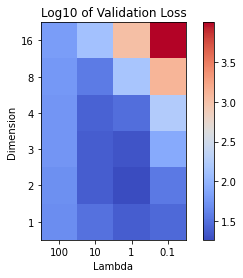

In [51]:
# Initialize the arrays for dimensions (d) and lambdas (l)
ds = [16, 8, 4, 3, 2, 1]
lambdas = [100, 10, 1, 0.1]

# Create an empty array to store the test loss values
test_losses = np.zeros((len(ds), len(lambdas)))

# Load the test loss values from the npy files
for i, d in enumerate(ds):
    for j, l in enumerate(lambdas):
        filename = f'bilinear_lambda_{l}_dimension_{d}.npy'
        result = np.load(filename)
        test_loss = result[0]
        test_losses[i, j] = np.log10(test_loss)

# Create a 2D heatmap plot
plt.imshow(test_losses, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(lambdas)), lambdas)
plt.yticks(range(len(ds)), ds)
plt.xlabel('Lambda')
plt.ylabel('Dimension')
plt.title ('Log10 of Validation Loss')
plt.show()

In [52]:
# Find the minimal element and its index
min_value = np.min(test_losses)
min_index = np.unravel_index(np.argmin(test_losses), test_losses.shape)

# Get the values of d and l for the minimal test loss
opt_d = ds[min_index[0]]
opt_l = lambdas[min_index[1]]

# Print the minimal test loss and its corresponding d and l values
print("Minimal Log10 of Test Loss:", min_value)
print("d for Minimal Test Loss:", opt_d)
print("l for Minimal Test Loss:", opt_l)

Minimal Log10 of Test Loss: 1.266738551629941
d for Minimal Test Loss: 2
l for Minimal Test Loss: 1
